In [9]:
#Импорт нужных библиотек. 
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np
import os
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import itertools
from datetime import datetime
import seaborn as sns

In [116]:
df = pd.read_excel(r'D:\Kortunov\transfer\Esentuk\oshibka.xlsx', header = 1)

In [117]:
df = df*10
df = df.iloc[:,0:6]

In [118]:
df = 10-df
df = df.replace(0.000000	, 0.0001)
df[df < 0] = 0.0001
df

,Центральный,Средне-Ессентукский,Новоблаго-дарненский,Бугунтинский,Горный,Западно-Быкогорский
0,0.000100,6.454545,0.142069,0.728,0.2,0.000100
1,0.000100,2.930909,0.000100,0.728,0.1,0.164286
2,0.000100,2.705455,0.142069,0.728,1.1,0.280000
3,0.000100,2.000000,0.142069,0.728,1.5,4.330000
4,0.000100,1.141818,0.000100,0.728,0.2,3.057143
...,...,...,...,...,...,...
122,0.000100,0.265818,0.000100,0.728,10.0,2.075000
123,0.135421,0.000100,0.142069,0.728,10.0,4.285667
124,0.000100,0.058182,0.142069,0.728,10.0,5.323500
125,0.000100,0.000100,0.020000,0.728,10.0,4.361084


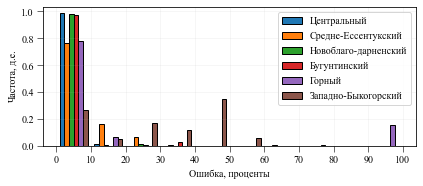

In [123]:
params = {
       'axes.labelsize': 10,
       'font.size': 10,
       'font.sans-serif': 'Times New Roman',
       'legend.fontsize': 12,
       'xtick.labelsize': 10,
       'ytick.labelsize': 10,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [17/2.54, 6.5/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
        'lines.linewidth': 0.5669291  ,
       }

rcParams.update(params)
bins= [0,10,20,30,40,50,60,70,80,90,100]
bins1= [0,1,2,3,4,5,6,7,8,9,10]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
ax.tick_params(which='minor', length=2.83465, width=0.5669291)
ax.tick_params(which='major', length=5.669291, width=0.5669291)# width=2


ax.grid(axis = 'both',which ='major',alpha = 0.2,linewidth = 0.57)#активиззирую сетку
ax.set_ylabel('Частота, д.е.', color = "black")
ax.set_xlabel('Ошибка, проценты', color = "Black")
ax.tick_params('y', colors= "black")

labels = ['Центральный',	'Средне-Ессентукский',	'Новоблаго-дарненский',	'Бугунтинский',	'Горный',	'Западно-Быкогорский']
ax.hist(df, bins=bins1, edgecolor="k",label=labels,density=True)
#n, bins  = np.histogram(x, num_bins, density=True)
ax.legend(prop={'size': 10})
ax.set_xticks(bins1)
ax.set_xticklabels(bins)
directory = 'D:\\WORK\\MSU\\Esentuk\\error'
filename = '\\'+'errors'# и рисунок поменял на джипег
fullpath = directory + filename
if not os.path.exists(directory):
    os.makedirs(directory)
keepcharacters = (' ','.','_',')','(','\\',':')
fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
#for item in p:
 #   item.set_height(p.get_height()/p.get_width())
#plt.bar(bins[:-1], n*len(df.index), align="edge", width=np.diff(bins), ec="k")
plt.show()     

In [115]:
df

,Центральный,Средне-Ессентукский,Новоблаго-дарненский,Бугунтинский,Горный,Западно-Быкогорский
0,0.000100,6.454545,0.142069,0.728,0.2,-3.538571
1,0.000100,2.930909,-0.080000,0.728,0.1,0.164286
2,0.000100,2.705455,0.142069,0.728,1.1,0.280000
3,0.000100,2.000000,0.142069,0.728,1.5,4.330000
4,0.000100,1.141818,-0.080000,0.728,0.2,3.057143
...,...,...,...,...,...,...
122,-0.001565,0.265818,-0.080000,0.728,10.0,2.075000
123,0.135421,-0.016364,0.142069,0.728,10.0,4.285667
124,-0.041487,0.058182,0.142069,0.728,10.0,5.323500
125,-0.001565,-0.127636,0.020000,0.728,10.0,4.361084


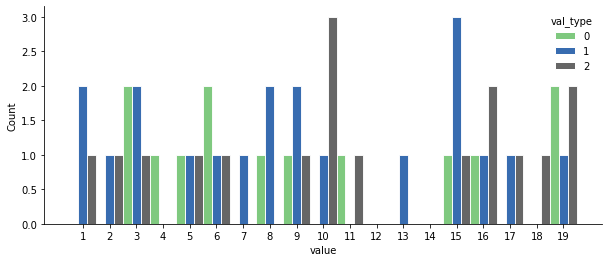

In [14]:
# Set parameters for random data
rng = np.random.default_rng(seed=1) # random number generator
size = 50
xmin = 1
xmax = 20

# Create random dataframe
df = pd.DataFrame(dict(value = rng.integers(xmin, xmax, size=size),
                       val_type = rng.choice([0, 1, 2], size=size)))

# Create histogram with discrete bins (bin width is 1), colored by type
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df, x='value', hue='val_type', multiple='dodge', discrete=True,
             edgecolor='white', palette=plt.cm.Accent, alpha=1)

# Create x ticks covering the range of all integer values of df['value']
ax.set_xticks(np.arange(df['value'].min(), df['value'].max()+1))

# Additional formatting
sns.despine()
ax.get_legend().set_frame_on(False)

plt.show()

In [15]:
df

,value,val_type
0,9,0
1,10,2
2,15,0
3,19,1
4,1,2
5,3,0
6,16,2
7,19,0
8,5,0
9,6,2
